<a href="https://colab.research.google.com/github/zaid171/NLP-SENTIMENT-ANALYSIS/blob/main/NLP_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## install and import

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn nltk wordcloud streamlit transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.2 MB/s eta 0:00:00


## install

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## load dataset

In [3]:
df = pd.read_csv("/content/chatgpt_style_reviews_dataset.xlsx - Sheet1.csv")

print(df.head())
print(df.info())

         date                                              title  \
0  2024-12-24   East list local interesting far magazine father.   
1  2024-07-26  Road determine picture figure hard experience ...   
2  2024-08-22                 Policy social past analysis whole.   
3  2025-04-24               News financial billion four foreign.   
4  2024-08-15                To skill she case sing stop likely.   

                                              review  rating     username  \
0  Impressive natural language understanding. Alm...       1     darren55   
1  Sometimes gives wrong answers or outdated info...       2   davistyler   
2  Great tool for generating content quickly. Int...       5     andrea59   
3  Great tool for generating content quickly. Sta...       3      dcooper   
4  Excellent for language translation and grammar...       1  christine79   

   helpful_votes  review_length     platform language  \
0             25              9  Google Play       de   
1             

## preprocessing

In [4]:
import re
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", "", text)   # remove punctuation/numbers
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df["clean_review"] = df["review"].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## EDA

/tmp/ipython-input-1065872668.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=df, palette="viridis")


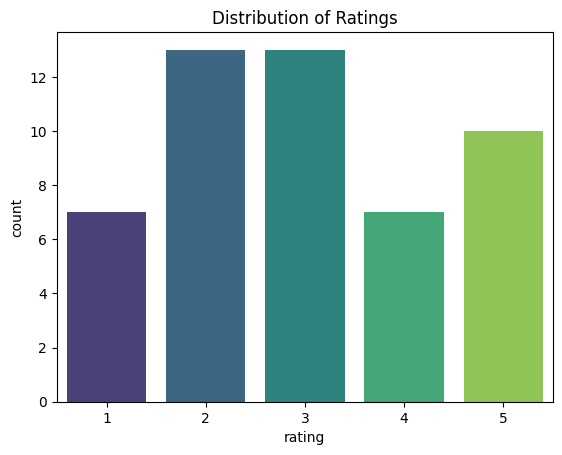

In [5]:
sns.countplot(x="rating", data=df, palette="viridis")
plt.title("Distribution of Ratings")
plt.show()


## Word Cloud (Positive vs Negative)

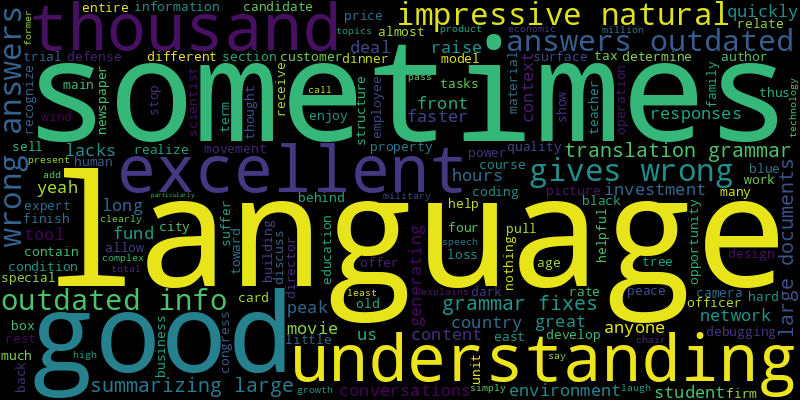

In [6]:
pos_text = " ".join(df[df["rating"] >= 4]["clean_review"])
neg_text = " ".join(df[df["rating"] <= 2]["clean_review"])

WordCloud(width=800, height=400, background_color="white").generate(pos_text).to_image()
WordCloud(width=800, height=400, background_color="black").generate(neg_text).to_image()


## sentiment labelling

In [7]:
def get_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df["sentiment"] = df["rating"].apply(get_sentiment)
print(df["sentiment"].value_counts())


sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64


## train and test split

In [8]:
X = df["clean_review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [9]:
display(df.head())

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review,sentiment
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,impressive natural language understanding almo...,Negative
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,sometimes gives wrong answers outdated info st...,Negative
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,great tool generating content quickly interest...,Positive
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No,great tool generating content quickly start me...,Neutral
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes,excellent language translation grammar fixes p...,Negative


## train ML model

In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.43      0.75      0.55         4
     Neutral       0.00      0.00      0.00         3
    Positive       0.00      0.00      0.00         3

    accuracy                           0.30        10
   macro avg       0.14      0.25      0.18        10
weighted avg       0.17      0.30      0.22        10

Accuracy: 0.3


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## confusion matrix

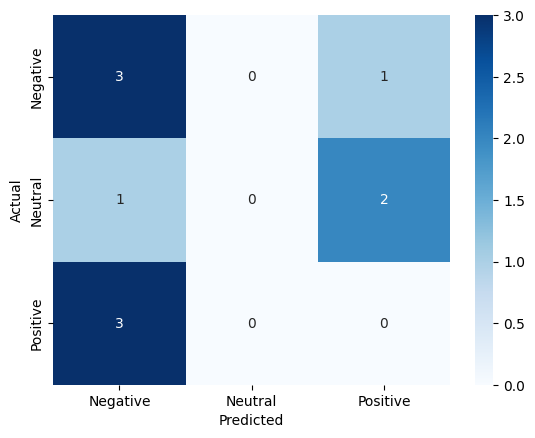

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## streamlit app.py

In [14]:
import streamlit as st
import joblib
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Load model + vectorizer
model = joblib.load("/content/sentiment_model.pkl")
vectorizer = joblib.load("/content/vectorizer.pkl")

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

st.title("📊 AI Echo - Sentiment Analysis")
user_input = st.text_area("Enter a review:")

if st.button("Analyze"):
    if user_input.strip():
        cleaned = clean_text(user_input)
        vec = vectorizer.transform([cleaned])
        prediction = model.predict(vec)[0]
        st.success(f"Predicted Sentiment: {prediction}")


2025-09-24 06:35:56.122 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 06:35:56.358 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-24 06:35:56.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 06:35:56.360 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 06:35:56.362 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 06:35:56.364 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 06:35:56.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 06:35:56.367 Thread 'MainThread': mi

In [15]:
import joblib

# Save the trained model and vectorizer
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


In [ ]:
get_ipython().system('streamlit run app.py')

## extra work

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np

# Load the data
df = pd.read_csv('chatgpt_style_reviews_dataset.xlsx - Sheet1.csv')

# Set up the visualization style
plt.style.use('default')
fig = plt.figure(figsize=(20, 25))
plt.show

In [ ]:
# 1. Distribution of review ratings
plt.subplot(5, 2, 1)
rating_counts = df['rating'].value_counts().sort_index()
colors = ['#ff6b6b', '#ffa726', '#ffee58', '#90caf9', '#66bb6a']
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors, alpha=0.8)
plt.title('Distribution of Review Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 6))
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')


In [ ]:
 ##2. Helpful reviews (threshold: >10 helpful votes)
plt.subplot(5, 2, 2)
threshold = 10
helpful_reviews = len(df[df['helpful_votes'] > threshold])
not_helpful_reviews = len(df) - helpful_reviews

plt.pie([helpful_reviews, not_helpful_reviews],
        labels=[f'Helpful (>10 votes)\n{helpful_reviews} reviews',
                f'Not Helpful (≤10 votes)\n{not_helpful_reviews} reviews'],
        autopct='%1.1f%%', colors=['#4CAF50', '#FF9800'])
plt.title('Proportion of Helpful Reviews\n(Threshold: >10 helpful votes)', fontsize=14, fontweight='bold')


In [ ]:
# 3. Most common keywords in positive vs negative reviews
# Prepare text data
positive_reviews = ' '.join(df[df['rating'] >= 4]['review'].astype(str))
negative_reviews = ' '.join(df[df['rating'] <= 2]['review'].astype(str))

# Positive reviews word cloud
plt.subplot(5, 2, 3)
wordcloud_positive = WordCloud(width=400, height=300,
                              background_color='white', colormap='viridis').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews (4-5 stars)\nCommon Keywords', fontsize=12, fontweight='bold')

# Negative reviews word cloud
plt.subplot(5, 2, 4)
wordcloud_negative = WordCloud(width=400, height=300,
                              background_color='white', colormap='Reds').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews (1-2 stars)\nCommon Keywords', fontsize=12, fontweight='bold')


In [ ]:
# 4. Average rating over time
plt.subplot(5, 2, 5)
df['date'] = pd.to_datetime(df['date'])
monthly_avg = df.groupby(df['date'].dt.to_period('M'))['rating'].mean()
monthly_avg.index = monthly_avg.index.astype(str)

plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2, markersize=6)
plt.title('Average Rating Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)


In [ ]:
# 5. Ratings by platform
plt.subplot(5, 2, 6)
platform_ratings = df.groupby('platform')['rating'].mean().sort_values(ascending=False)
bars = plt.bar(platform_ratings.index, platform_ratings.values, color='skyblue', alpha=0.8)
plt.title('Average Rating by Platform', fontsize=14, fontweight='bold')
plt.xlabel('Platform')
plt.ylabel('Average Rating')
plt.ylim(0, 5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')


In [ ]:
# 6. Verified vs Non-verified users
plt.subplot(5, 2, 7)
verified_avg = df[df['verified_purchase'] == 'Yes']['rating'].mean()
non_verified_avg = df[df['verified_purchase'] == 'No']['rating'].mean()

plt.bar(['Verified\nUsers', 'Non-Verified\nUsers'], [verified_avg, non_verified_avg],
        color=['#2196F3', '#FFC107'], alpha=0.8)
plt.title('Average Rating: Verified vs Non-Verified Users', fontsize=14, fontweight='bold')
plt.ylabel('Average Rating')
plt.ylim(0, 5)

# Add value labels
plt.text(0, verified_avg + 0.1, f'{verified_avg:.2f}', ha='center', va='bottom', fontweight='bold')
plt.text(1, non_verified_avg + 0.1, f'{non_verified_avg:.2f}', ha='center', va='bottom', fontweight='bold')


In [ ]:
# 7. Review length by rating
plt.subplot(5, 2, 8)
df['review_length'] = df['review'].str.split().str.len()
rating_length = df.groupby('rating')['review_length'].mean()

plt.bar(rating_length.index, rating_length.values, color='lightgreen', alpha=0.8)
plt.title('Average Review Length by Rating', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Average Word Count')
plt.xticks(range(1, 6))


In [ ]:
# 8. Top locations by number of reviews
plt.subplot(5, 2, 9)
top_locations = df['location'].value_counts().head(5)
plt.barh(top_locations.index, top_locations.values, color='lightcoral', alpha=0.9)
plt.title('Top 5 Locations by Number of Reviews', fontsize=14, fontweight='bold')
plt.xlabel('Number of Reviews')
plt.gca().invert_yaxis()


In [ ]:
# 9. Ratings by language
plt.subplot(5, 2, 10)
language_ratings = df.groupby('language')['rating'].mean().sort_values(ascending=False)
bars = plt.bar(language_ratings.index, language_ratings.values, color='plum', alpha=0.8)
plt.title('Average Rating by Language', fontsize=14, fontweight='bold')
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.ylim(0, 5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## NLP

In [ ]:
!pip install gensim